In [1]:
import tensorflow as tf
import art
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.disable_eager_execution()
print(f'Tensorflow version {tf.__version__}')
print(f'ART Version {art.__version__}')
import sys
sys.path.append('../lib')
import utils
from utils import load_preprocess, show_adversarial_images

2024-06-12 16:25:25.537959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 16:25:25.537989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 16:25:25.539071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version 2.15.1
ART Version 1.17.1


In [2]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
# Load a pre-trained ResNet50 model trained on ImageNet
model = ResNet50V2(weights='imagenet')
utils.model = model

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
   
plane1 = load_preprocess('../images/plane1.jpg')
plane2 = load_preprocess('../images/plane2.jpg')
plane3 = load_preprocess('../images/plane3.jpg')


In [4]:
from art.estimators.classification import KerasClassifier
# Create a classifier from the model and constrain input ranges to range for image values i.e 0..255 
classifier = KerasClassifier(model=model, clip_values=(0, 255))
# Unified attack function
def attack(sample,  attack_class, wrapper=classifier,  **kwargs):
    attack_instance = attack_class(wrapper, **kwargs)
    x_adv = attack_instance.generate(x=sample)
    adv_img = show_adversarial_images(sample, x_adv)
    return x_adv, adv_img

## FSGM Untargeted Attacks

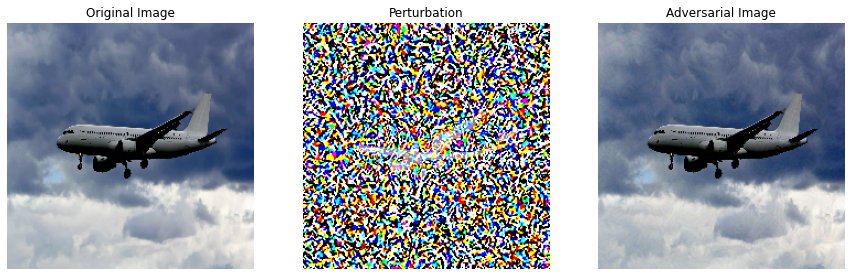

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9424501}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 0.998052}


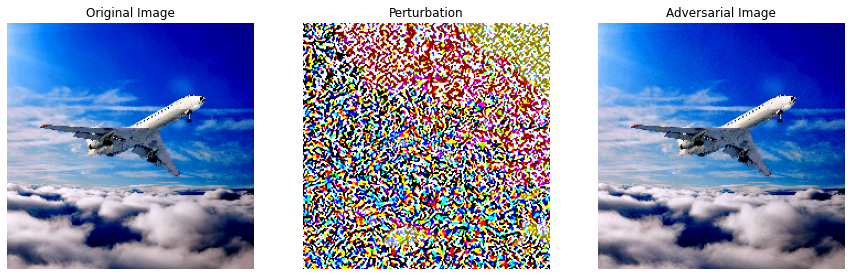

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.85088706}
prediction for adversarial image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.5025984}


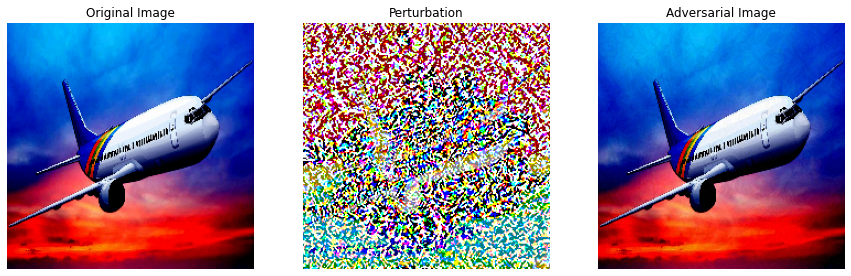

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.84541047}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.9999776}


In [5]:
from art.attacks.evasion import FastGradientMethod
_, _ = attack(plane1, FastGradientMethod, eps=0.01)
_, _ = attack(plane2, FastGradientMethod, eps=0.01)
_, _ = attack(plane3, FastGradientMethod, eps=0.01)

In [6]:
## BMI Attack

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

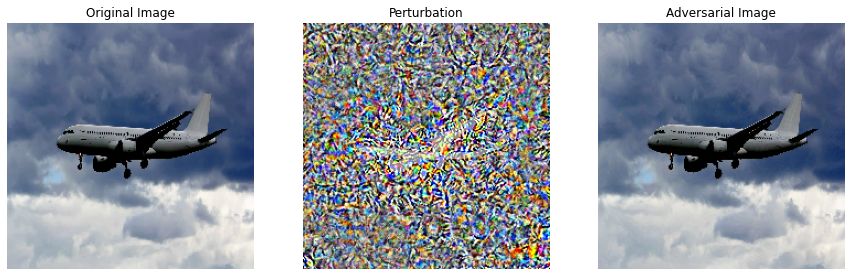

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9424501}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 1.0}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

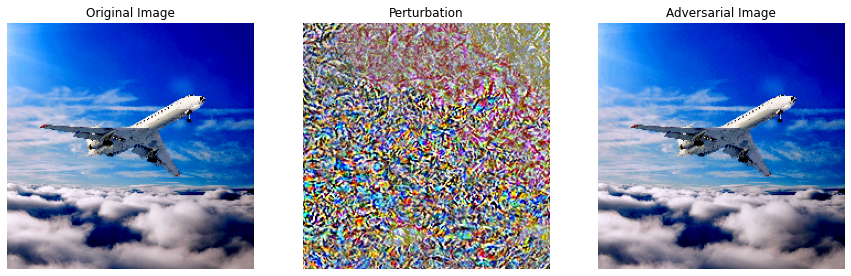

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.85088706}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 1.0}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

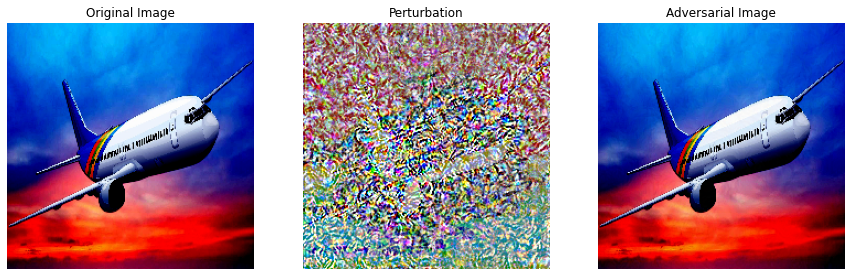

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.84541047}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.9999981}


In [7]:
from art.attacks.evasion import BasicIterativeMethod

def bmi_attack(sample, wrapper=classifier,  eps=0.01, eps_step=0.001, max_iter=10, batch_size=32):
    return attack(sample, BasicIterativeMethod,wrapper=classifier,  eps=0.01, eps_step=0.001, max_iter=10, batch_size=32)

_,_= bmi_attack(plane1)
_,_= bmi_attack(plane2)
_,_= bmi_attack(plane3)


In [8]:
## JSMA Attack

JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

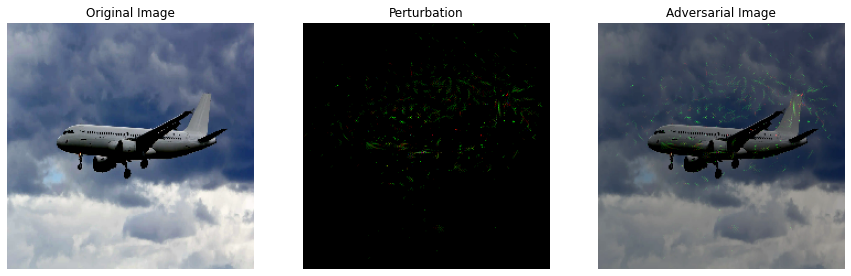

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9424501}
prediction for adversarial image: 
 {'label': 198, 'wordnet_id': 'n02097209', 'class_name': 'standard_schnauzer', 'confidence_score': 0.23849757}


JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

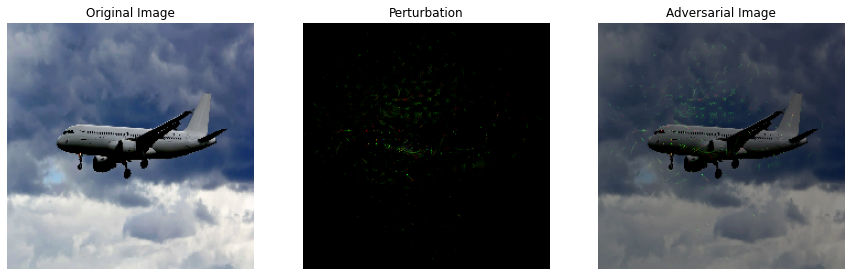

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9424501}
prediction for adversarial image: 
 {'label': 967, 'wordnet_id': 'n07920052', 'class_name': 'espresso', 'confidence_score': 0.18165219}


JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

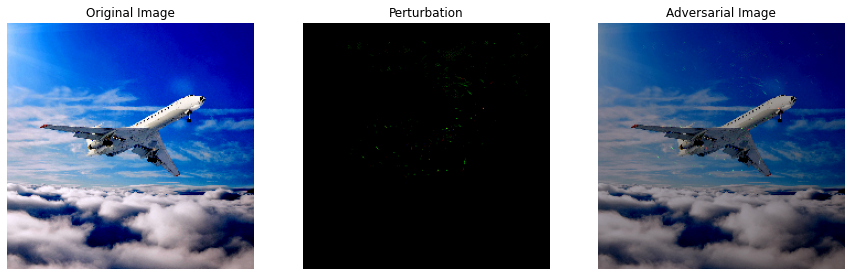

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.85088706}
prediction for adversarial image: 
 {'label': 194, 'wordnet_id': 'n02096437', 'class_name': 'Dandie_Dinmont', 'confidence_score': 0.16128363}


JSMA:   0%|          | 0/1 [00:00<?, ?it/s]

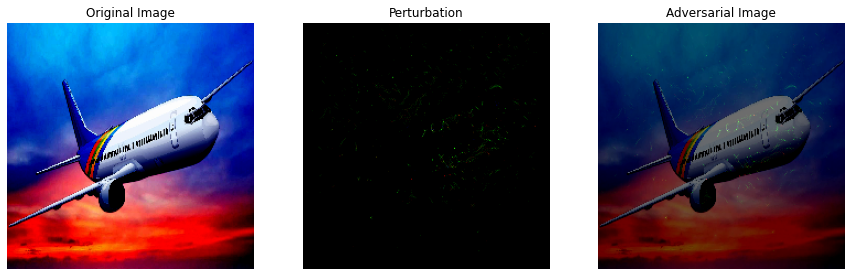

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.84541047}
prediction for adversarial image: 
 {'label': 391, 'wordnet_id': 'n02536864', 'class_name': 'coho', 'confidence_score': 0.25741982}


In [9]:
from art.attacks.evasion import SaliencyMapMethod

_, _ = attack(plane1, SaliencyMapMethod, theta=0.1, gamma=1, batch_size=1)
_, _ = attack(plane1, SaliencyMapMethod, theta=0.05, gamma=0.6, batch_size=1)
_, _ = attack(plane2, SaliencyMapMethod, theta=0.1, gamma=1, batch_size=1)
_, _ = attack(plane3, SaliencyMapMethod, theta=0.1, gamma=1, batch_size=1)


## Carlini-Wagner Attack

In [20]:
from art.attacks.evasion import CarliniL2Method

def cw_attack(sample, wrapper=classifier, confidence=0.1, batch_size=1, learning_rate=0.01, max_iter=10):
    return attack(sample,CarliniL2Method, wrapper=classifier, confidence=confidence, batch_size=batch_size, learning_rate=learning_rate, max_iter=max_iter)


C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

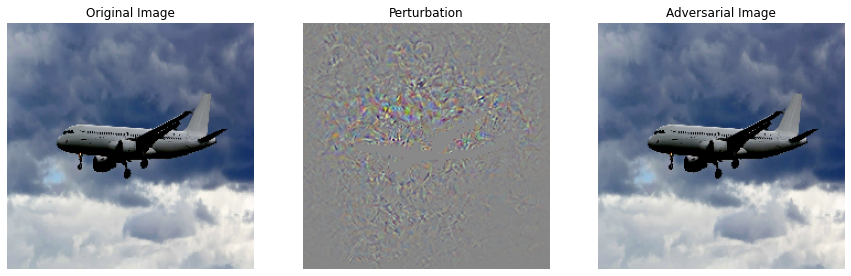

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9424501}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 0.7292199}


C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

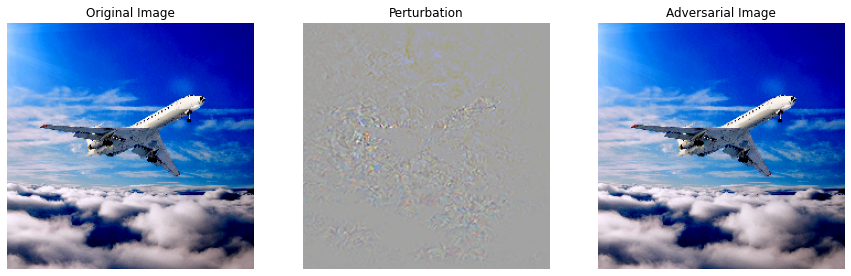

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.85088706}
prediction for adversarial image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.52653366}


C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

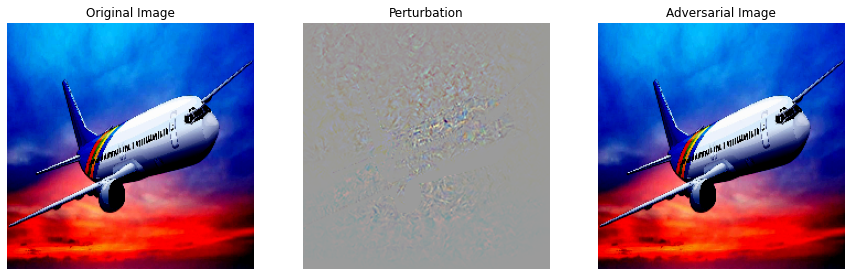

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.84541047}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.5585402}


In [21]:
_,_ = cw_attack(plane1)
_,_ = cw_attack(plane2)
_,_ = cw_attack(plane3)

## PGD attack

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

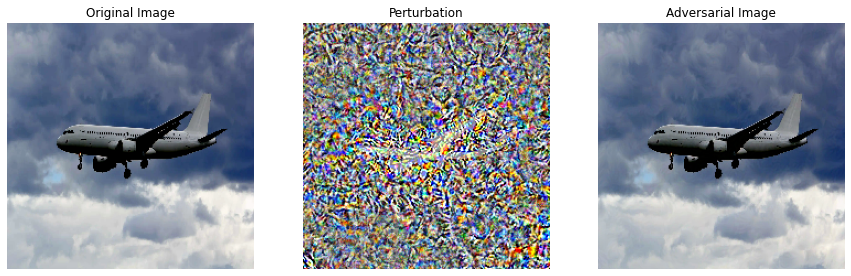

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.9424501}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 1.0}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

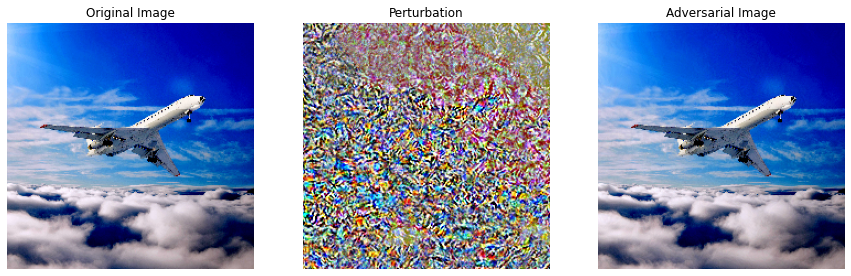

prediction for original image: 
 {'label': 908, 'wordnet_id': 'n04592741', 'class_name': 'wing', 'confidence_score': 0.85088706}
prediction for adversarial image: 
 {'label': 812, 'wordnet_id': 'n04266014', 'class_name': 'space_shuttle', 'confidence_score': 1.0}


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

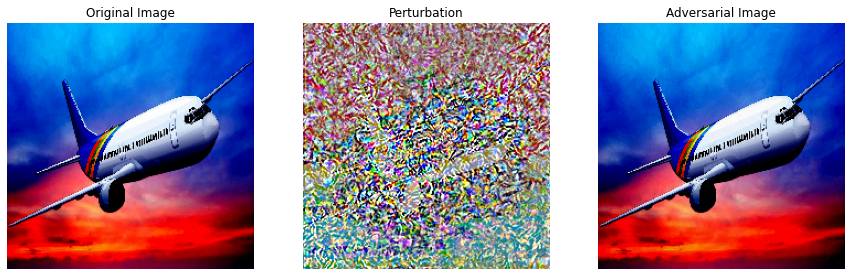

prediction for original image: 
 {'label': 404, 'wordnet_id': 'n02690373', 'class_name': 'airliner', 'confidence_score': 0.84541047}
prediction for adversarial image: 
 {'label': 405, 'wordnet_id': 'n02692877', 'class_name': 'airship', 'confidence_score': 0.99999726}


In [22]:
from art.attacks.evasion import ProjectedGradientDescent

def pgd_attack(sample, wrapper=classifier, eps=0.03, eps_step=0.001, max_iter=10, batch_size=1):
    return attack(sample, ProjectedGradientDescent, wrapper=classifier, eps=eps, eps_step=eps_step, max_iter=max_iter, batch_size=batch_size)

_,__ = pgd_attack(plane1)
_,__ = pgd_attack(plane2)
_,__ = pgd_attack(plane3)
